In [13]:
from PIL import Image
import torch
from diffusers import DiffusionPipeline, LMSDiscreteScheduler

from xattention_guidance.xattention_guidance import AttentionStore
from inference import bbox_inference, draw_box, show_cross_attention

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Guidance

In [3]:
noise_scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012,
                                           beta_schedule="scaled_linear", num_train_timesteps=1000)

pipeline = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", scheduler=noise_scheduler).to(device)
tokenizer = pipeline.tokenizer

unet\diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [9]:
example = {"prompt": "A cherry blossom tree and a blue kite atop a cliff overlooking a vast forest.",
            "phrases": "tree; kite",
            "bboxes": [[[0.1, 0.2, 0.5, 0.8]], [[0.6, 0.2, 0.9, 0.5]]],
            }

controller = AttentionStore()
pil_image = bbox_inference(
    device,
    pipeline,
    controller,
    example["prompt"],
    example["bboxes"],
    example["phrases"])
    
draw_box(pil_image[0], example['bboxes'], example['phrases'], "test.png")

  0%|          | 0/51 [00:00<?, ?it/s]

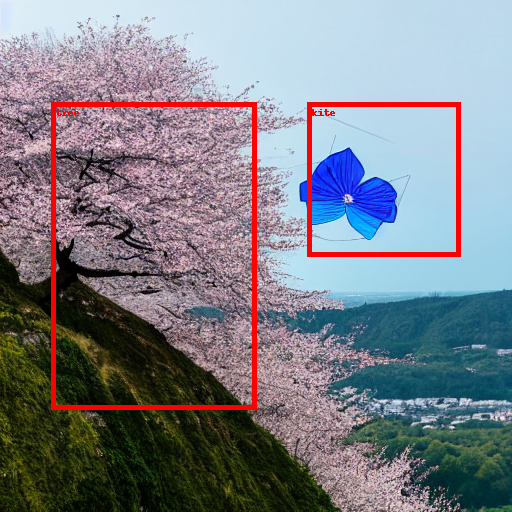

In [14]:
display(Image.open("test.png"))

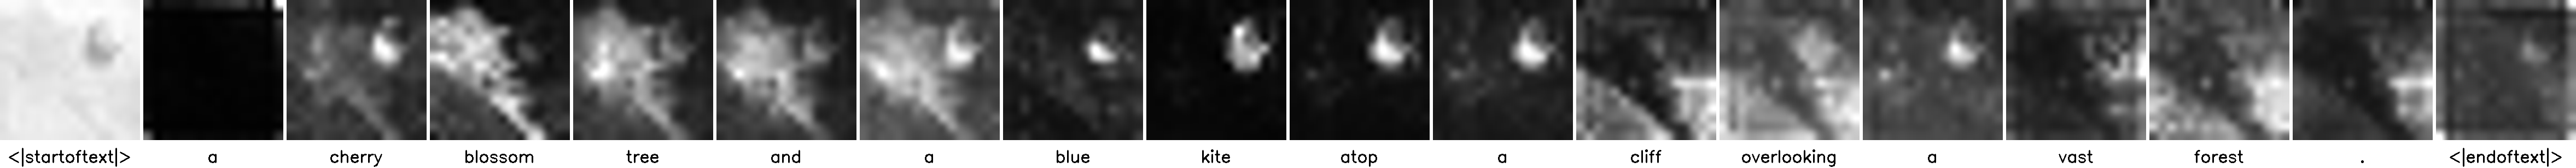

In [15]:
show_cross_attention(
    tokenizer,
    [example['prompt']],
    controller,
    res=16,
    from_where=('up', 'down'))

### Swap Boxes

In [16]:
example = {"prompt": "A cherry blossom tree and a blue kite atop a cliff overlooking a vast forest.",
            "phrases": "tree; kite",
            "bboxes": [[[0.6, 0.2, 0.9, 0.5]], [[0.1, 0.2, 0.5, 0.8]]],
            }

controller = AttentionStore()
pil_image = bbox_inference(
    device,
    pipeline,
    controller,
    example["prompt"],
    example["bboxes"],
    example["phrases"])
    
draw_box(pil_image[0], example['bboxes'], example['phrases'], "test.png")

  0%|          | 0/51 [00:00<?, ?it/s]

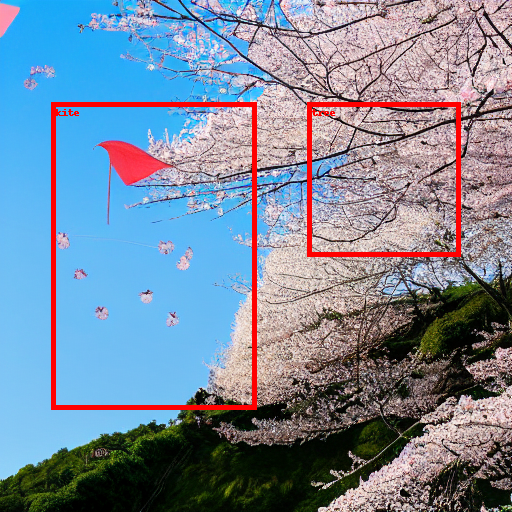

In [17]:
display(Image.open("test.png"))

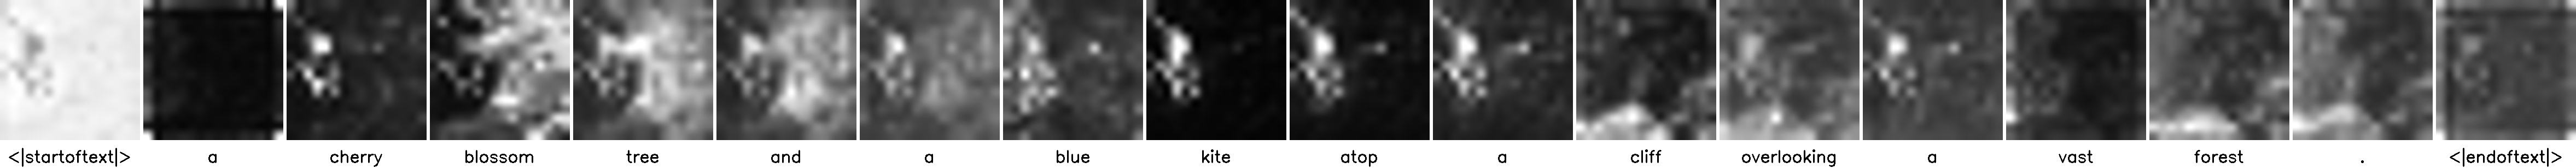

In [18]:
show_cross_attention(
    tokenizer,
    [example['prompt']],
    controller,
    res=16,
    from_where=('up', 'down'))

In [ ]:
#TODO: improve guidance